# Tuned K-Means Modelisation

In [281]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns="Tel") # Enlever la colonne tel


In [282]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values
    print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_)

In [283]:
def KMENASpp(data):
    kmeans = KMeans(n_clusters=2,random_state=5081)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values

    x1,x2,x3,x4 = val[0][0],val[0][1],val[1][0],val[1][1]
    #print(val[0].argmax()) #Colonne du cluster dominant selon la target good
    cl_0 = [x1,x3]
    cl_1 = [x2,x4]
    cl = [cl_0,cl_1]
    if x1+x3 < x2+x4 :
        bcpg = x1/(x1+x2)
        gcpb = x4/(x4+x3)
    else:
        bcpg = x3/(x3+x4)
        gcpb = x2/(x2+x1)
    #bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
    #gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
    
    #print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_),(bcpg,gcpb)

In [284]:
data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns=["Tel"]) # Enlever la colonne tel
ll = list(data1)
len(ll)

19

In [285]:
choices = []
def randr(n,list):
    choices = []
    if n<20:
        while len(choices) < n :
            selection = random.choice(list)
            if selection not in choices:
                choices.append(selection)
        return choices

In [286]:
dropped = []
percentages = []
cross = []
for i in range(500):
    x = randr(3,ll)
    dropped.append(x)
    #############################################################
    data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
    labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
    data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
    data1 = data1.drop(columns=["Tel"]) # Enlever la colonne tel
    ####
    data1 = data1.drop(columns= x) 
    #print(len(list(data1)))
    ####

    data_cat = data1.select_dtypes(include=['object'])
    data_cat_og = data1.select_dtypes(include=['object'])
    data_num_og = data1._get_numeric_data()
    data_num = data1._get_numeric_data()

    for col in data_cat:
        onehot = pd.get_dummies(data_cat[col])
        data_cat = data_cat.drop(col,axis = 1)
        data_cat = data_cat.join(onehot)

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

    data = [data_num_sc,data_cat]
    data_join = pd.concat(data,axis=1)
    
    reduced_data = PCA(n_components=2).fit_transform(data_join)
    reduced_join = pd.DataFrame(reduced_data)
    #KMENAS(reduced_join)
    ##########################################################
    
    a,b = KMENASpp(reduced_join)
    percentages.append(b)
    cross.append(a)
    #print(i)
    

In [287]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # Offline plotly version
import plotly.graph_objs as go 
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

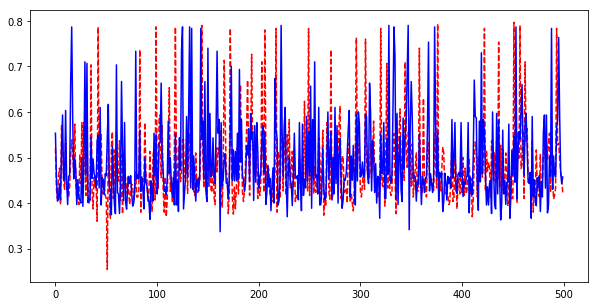

In [288]:
ppp = [i for i in range(500)]
sss = []
for per in percentages:
    sss.append(list(per))
sss = np.array(sss)
plt.figure(figsize=(10,5))
plt.plot(ppp,sss[:,0],'r--',ppp,sss[:,1],'b')


In [307]:
k=0
l=[]
for i in sss:
    if i[1]<0.45:
        l.append(k)
    k=k+1

dropped_flat = [item for sub in dropped for item in sub]

k=0
dropped_2 = []
for sub in dropped:
    if k in l:
        dropped_2.append(dropped[k])
    k=k+1
    
dropped_flat = [item for sub in dropped_2 for item in sub]
dropped_set = set(dropped_flat)

In [308]:
count = []
for el in dropped_set:
    count.append(dropped_flat.count(el))

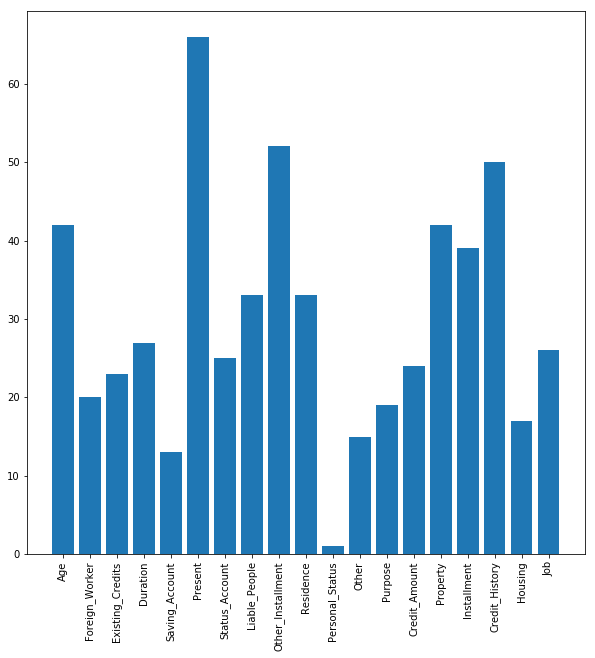

In [309]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10),)
plt.bar(list(dropped_set),count);
plt.xticks(rotation='vertical')
plt.show()

In [296]:
nn = []
for i in ll:
    if i not in dropped_set:
        print(i)
        nn.append(i)

In [310]:
data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns=["Tel"]) # Enlever la colonne tel
####

col = ['Present',
 'Foreign_Worker',
 'Credit_History',
 'Other_Installment',
 'Residence',
 'Existing_Credits',
 'Installment',
 'Job',
 'Housing',
 'Personal_Status',
'Credit_Amount']

data1 = data1.drop(columns=col)
####

data_cat = data1.select_dtypes(include=['object'])
data_cat_og = data1.select_dtypes(include=['object'])
data_num_og = data1._get_numeric_data()
data_num = data1._get_numeric_data()

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)
    
reduced_data = PCA(n_components=2).fit_transform(data_join)
reduced_join = pd.DataFrame(reduced_data)

#KMENAS(reduced_join)
##########################################################
  
a,b = KMENASpp(reduced_join)

In [311]:
a

col_0,0,1
Actual_Score,,
1,242,458
2,203,97
